In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
print(os.listdir('../input'))

['titanic']


In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [7]:
import pandas as pd

# Number of rows to read (use None to read full file)
nRowsRead = 1000

# Read the CSV file from Kaggle input directory
df1 = pd.read_csv('/kaggle/input/titanic/train_and_test2.csv', nrows=nRowsRead)

# Get number of rows and columns
nRow, nCol = df1.shape

# Print result
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 28 columns


In [8]:
df1.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[c for c in df if 1 < nunique[c] < 50]]
    nCol = df.shape[1]
    nGraphRow = math.ceil(nCol / nGraphPerRow)

    plt.figure(figsize=(6*nGraphPerRow, 8*nGraphRow))

    for i, col in enumerate(df.columns[:nGraphShown]):
        plt.subplot(nGraphRow, nGraphPerRow, i+1)
        if df[col].dtype == 'object':
            df[col].value_counts().plot.bar()
        else:
            df[col].hist()
        plt.title(col)
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


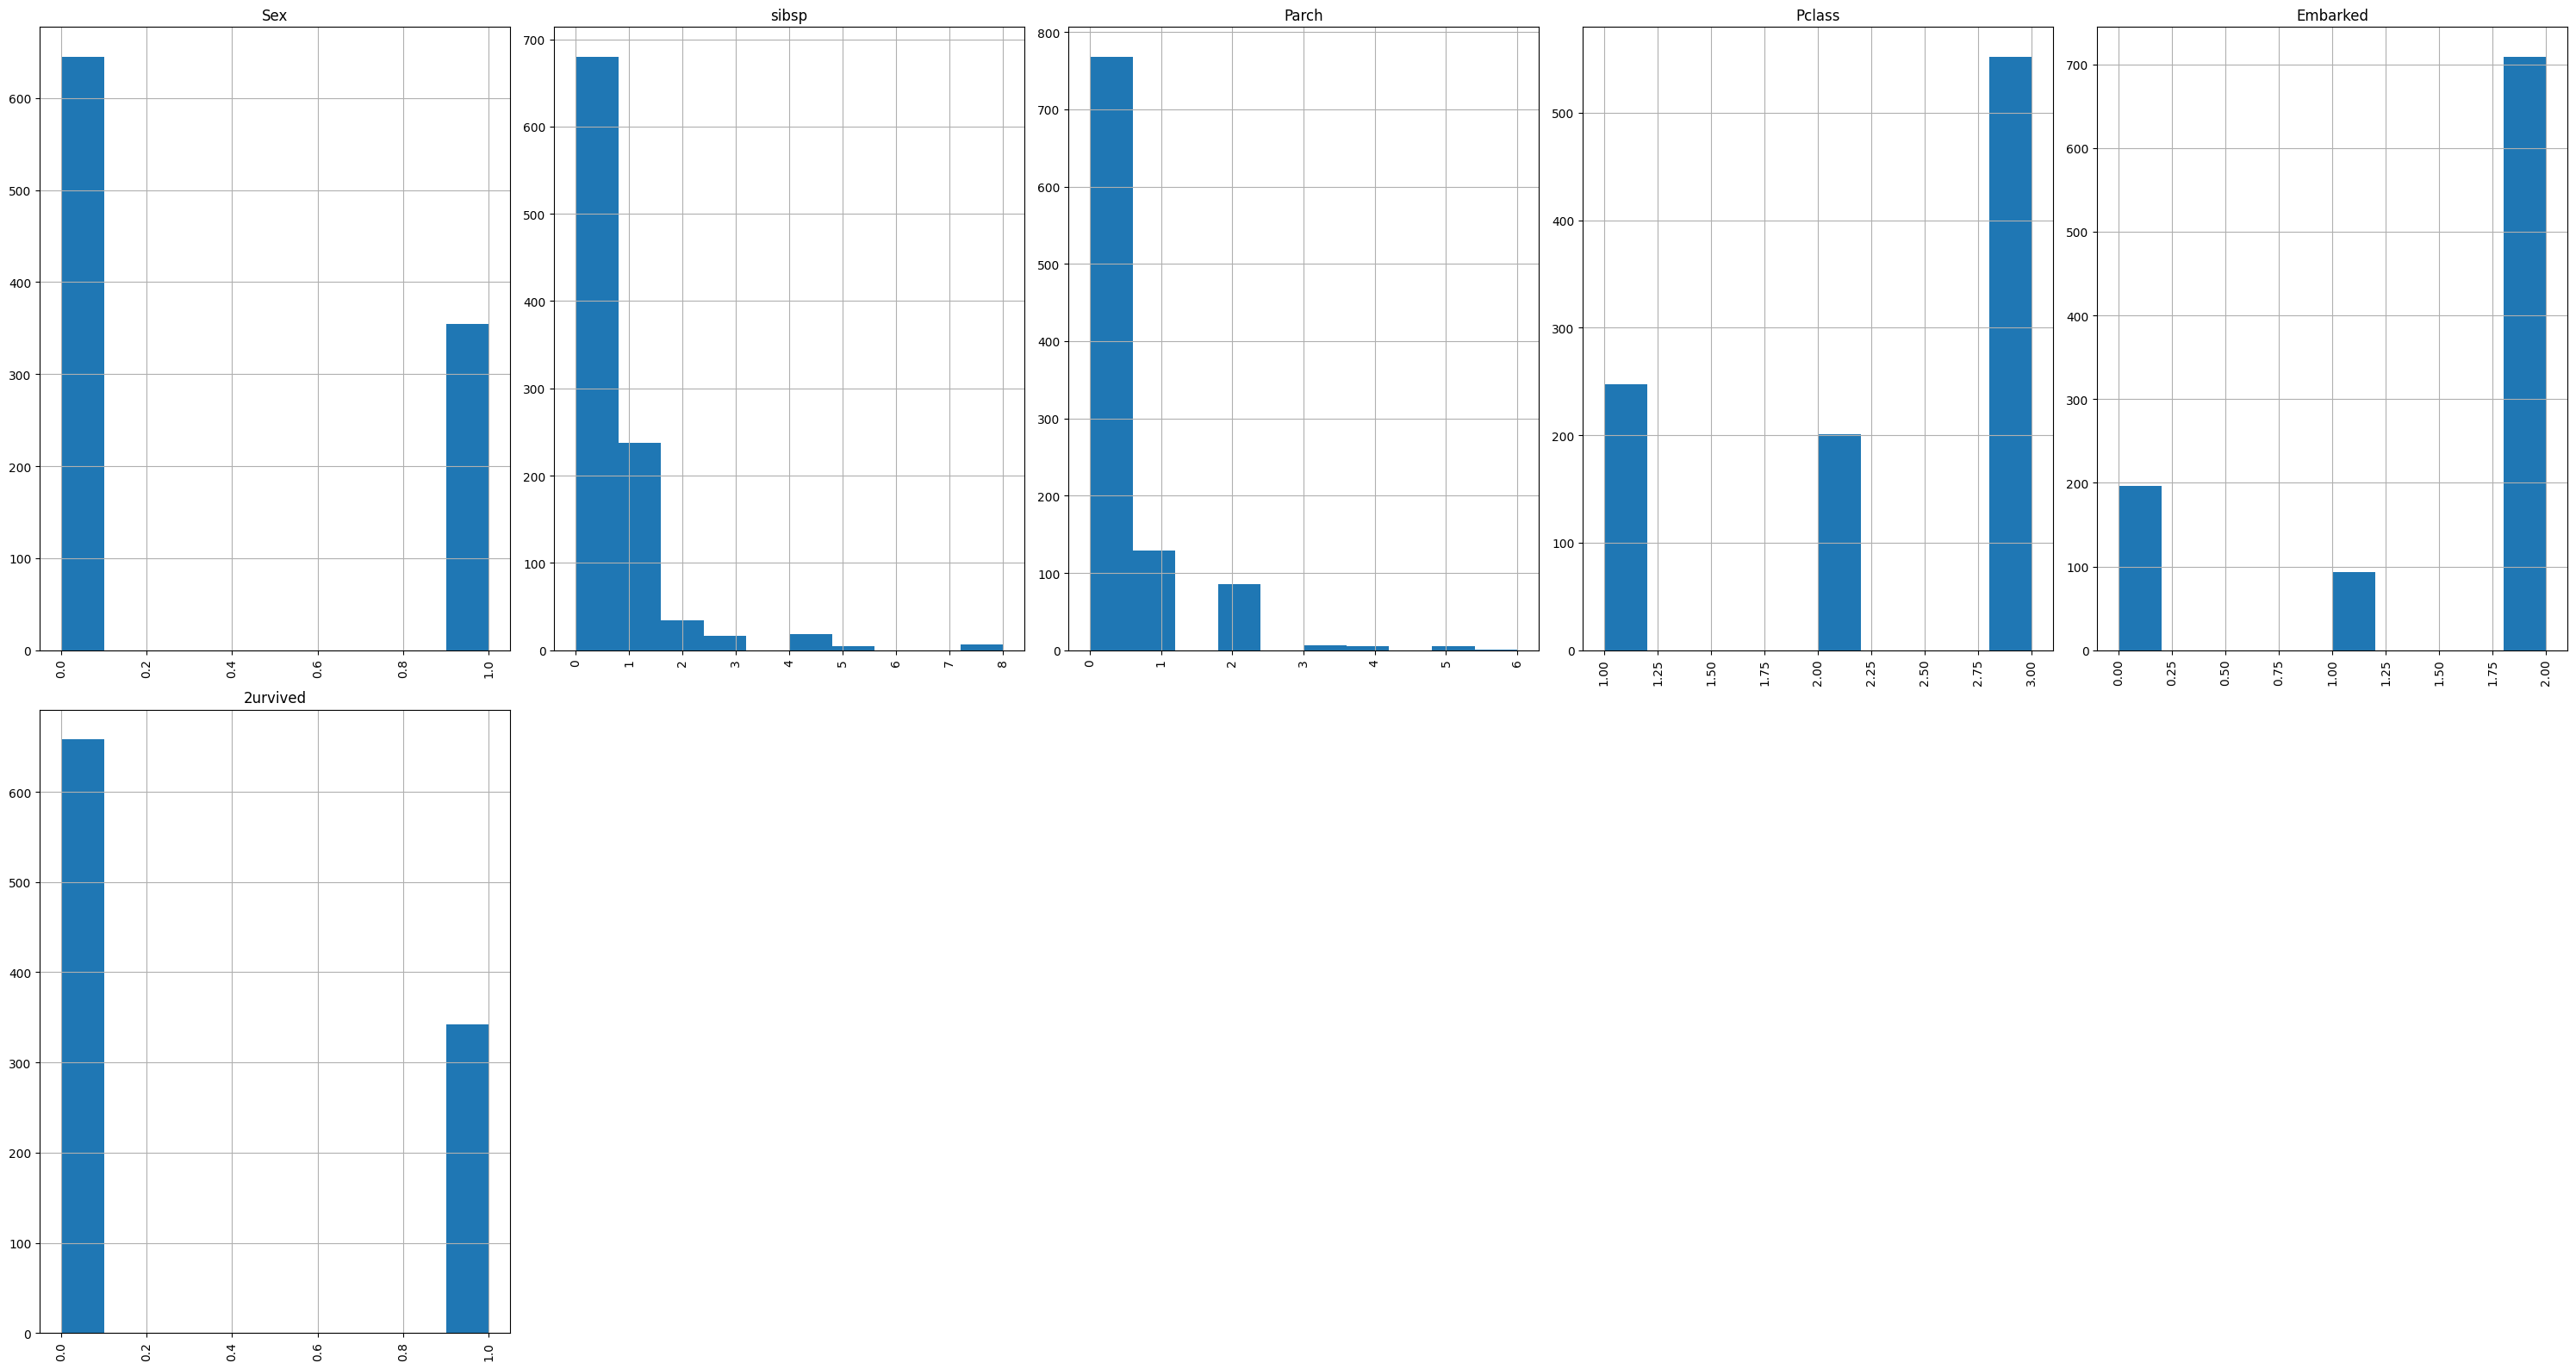

In [10]:
plotPerColumnDistribution(df1, 10, 5)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    
    # Keep only columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Create correlation matrix
    corr = df.corr()
    
    # Plot
    plt.figure(figsize=(graphWidth, graphWidth))
    plt.matshow(corr, cmap='coolwarm')  # removed fignum
    plt.colorbar()
    
    # Tick labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.title("Correlation Matrix", pad=20)
    plt.show()


<Figure size 800x800 with 0 Axes>

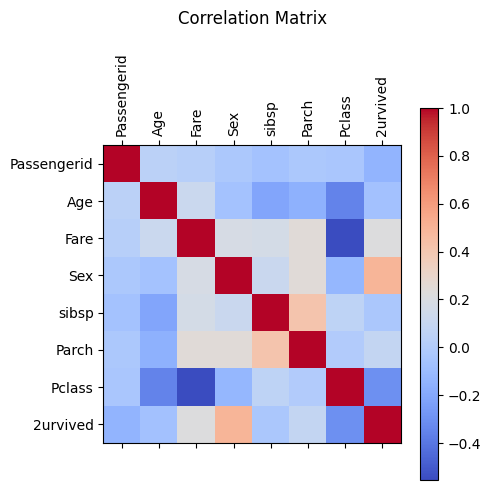

In [12]:
plotCorrelationMatrix(df1, 8)


In [13]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize=20, textSize=10):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Drop columns that contain any NaN
    df = df.dropna(axis=1)
    
    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # List of column names
    columnNames = list(df.columns)
    
    # Plot scatter matrix
    scatter_matrix(df, figsize=(plotSize, plotSize), diagonal='kde')
    
    # Title
    plt.suptitle('Scatter Matrix', size=textSize)
    plt.show()


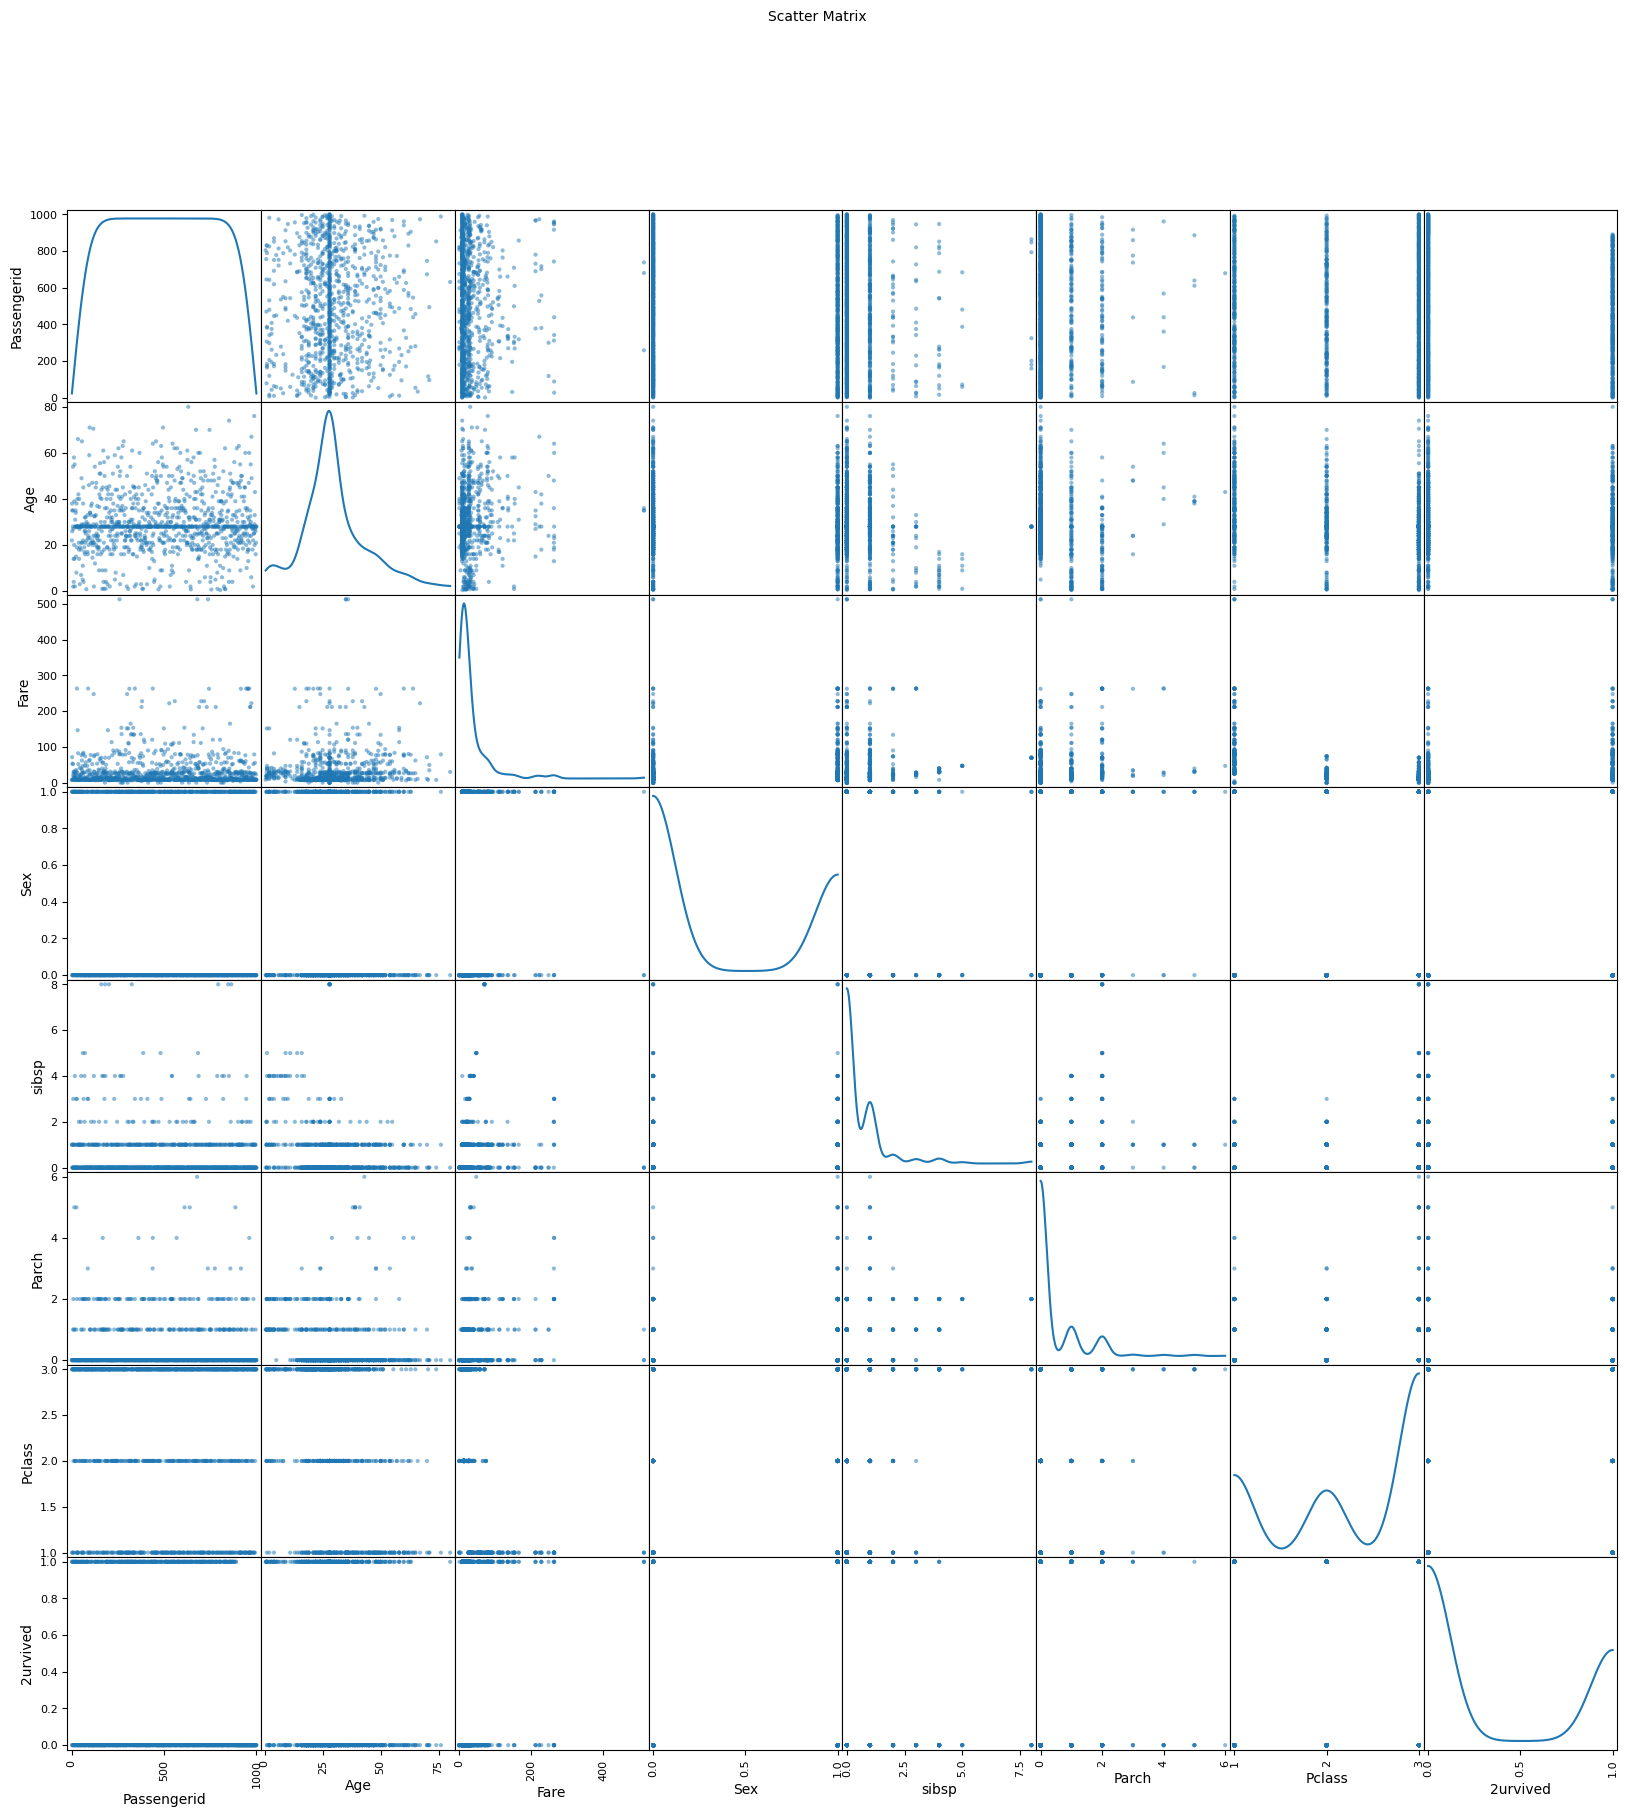

In [14]:
plotScatterMatrix(df1, 20, 10)